6. Get the passenger car mileage data from
http://lib.stat.cmu.edu/DASL/Datafiles/carmpgdat.html

(a) Fit a simple linear regression model to predict MPG (miles per
gallon) from HP (horsepower). Summarize your analysis including a
plot of the data with the fitted line.

(b) Repeat the analysis but use log(MPG) as the response. Compare
the analyses.

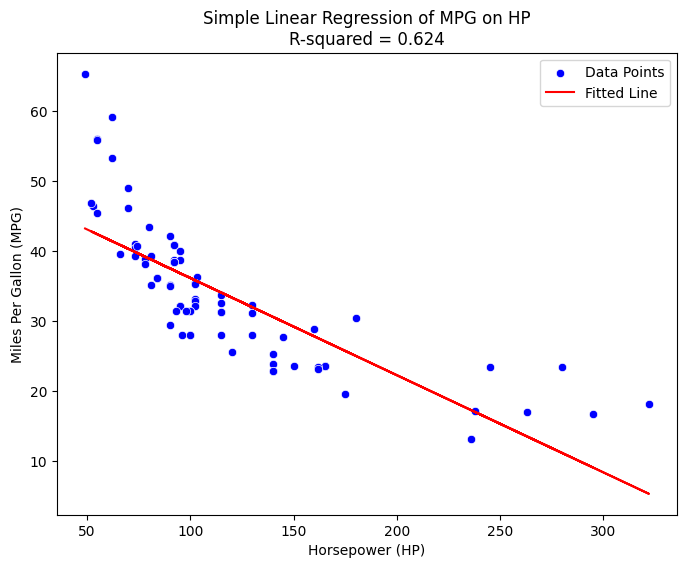

Subtask (a): Linear Regression of MPG on HP
Coefficient (β): -0.13902325890251532
Intercept (β_0): 50.06607807022755
R-squared: 0.6238730566764945


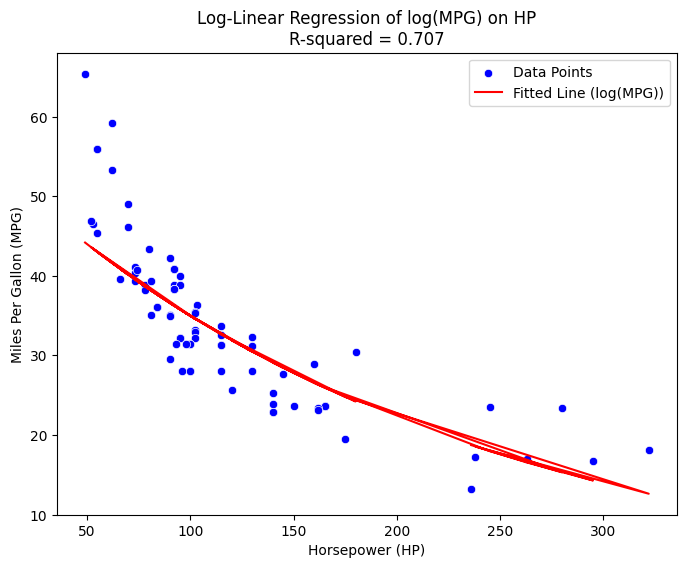

Subtask (b): Log-Linear Regression of log(MPG) on HP
Coefficient (β): -0.00458889589541349
Intercept (β_0): 4.013229399926886
R-squared: 0.7066452472670977


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

file_path = '/content/sample_data/passenger_car_mileage.csv'
df = pd.read_csv(file_path)

# Subtask (a): Fit a simple linear regression model to predict MPG from HP
X = df[['HP']]
y = df['MPG']

linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred = linear_model.predict(X)

r2_a = r2_score(y, y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['HP'], y=df['MPG'], color='blue', label='Data Points', edgecolor='w')
plt.plot(df['HP'], y_pred, color='red', label='Fitted Line')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.title(f'Simple Linear Regression of MPG on HP\nR-squared = {r2_a:.3f}')
plt.legend()
plt.show()

print("Subtask (a): Linear Regression of MPG on HP")
print("Coefficient (\u03B2):", linear_model.coef_[0])
print("Intercept (\u03B2_0):", linear_model.intercept_)
print("R-squared:", r2_a)

# Subtask (b): Fit a simple linear regression model to predict log(MPG) from HP
log_y = np.log(df['MPG'])

log_model = LinearRegression()
log_model.fit(X, log_y)

y_log_pred = log_model.predict(X)
exp_y_log_pred = np.exp(y_log_pred)

r2_b = r2_score(df['MPG'], exp_y_log_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['HP'], y=df['MPG'], color='blue', label='Data Points', edgecolor='w')
plt.plot(df['HP'], exp_y_log_pred, color='red', label='Fitted Line (log(MPG))')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.title(f'Log-Linear Regression of log(MPG) on HP\nR-squared = {r2_b:.3f}')
plt.legend()
plt.show()

print("Subtask (b): Log-Linear Regression of log(MPG) on HP")
print("Coefficient (\u03B2):", log_model.coef_[0])
print("Intercept (\u03B2_0):", log_model.intercept_)
print("R-squared:", r2_b)

7. Get the passenger car mileage data from
http://lib.stat.cmu.edu/DASL/Datafiles/carmpgdat.html

(a) Fit a multiple linear regression model to predict MPG (miles per
gallon) from the other variables. Summarize your analysis.


Coefficients: [-0.01700021  0.35712526 -1.18580989 -1.7973635 ]
Intercept: 182.62336168689217
Mean Squared Error (MSE): 20.71
R-squared (R2) score: 0.78


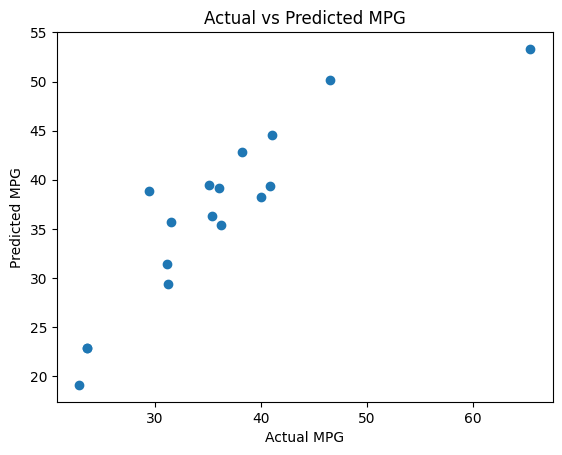

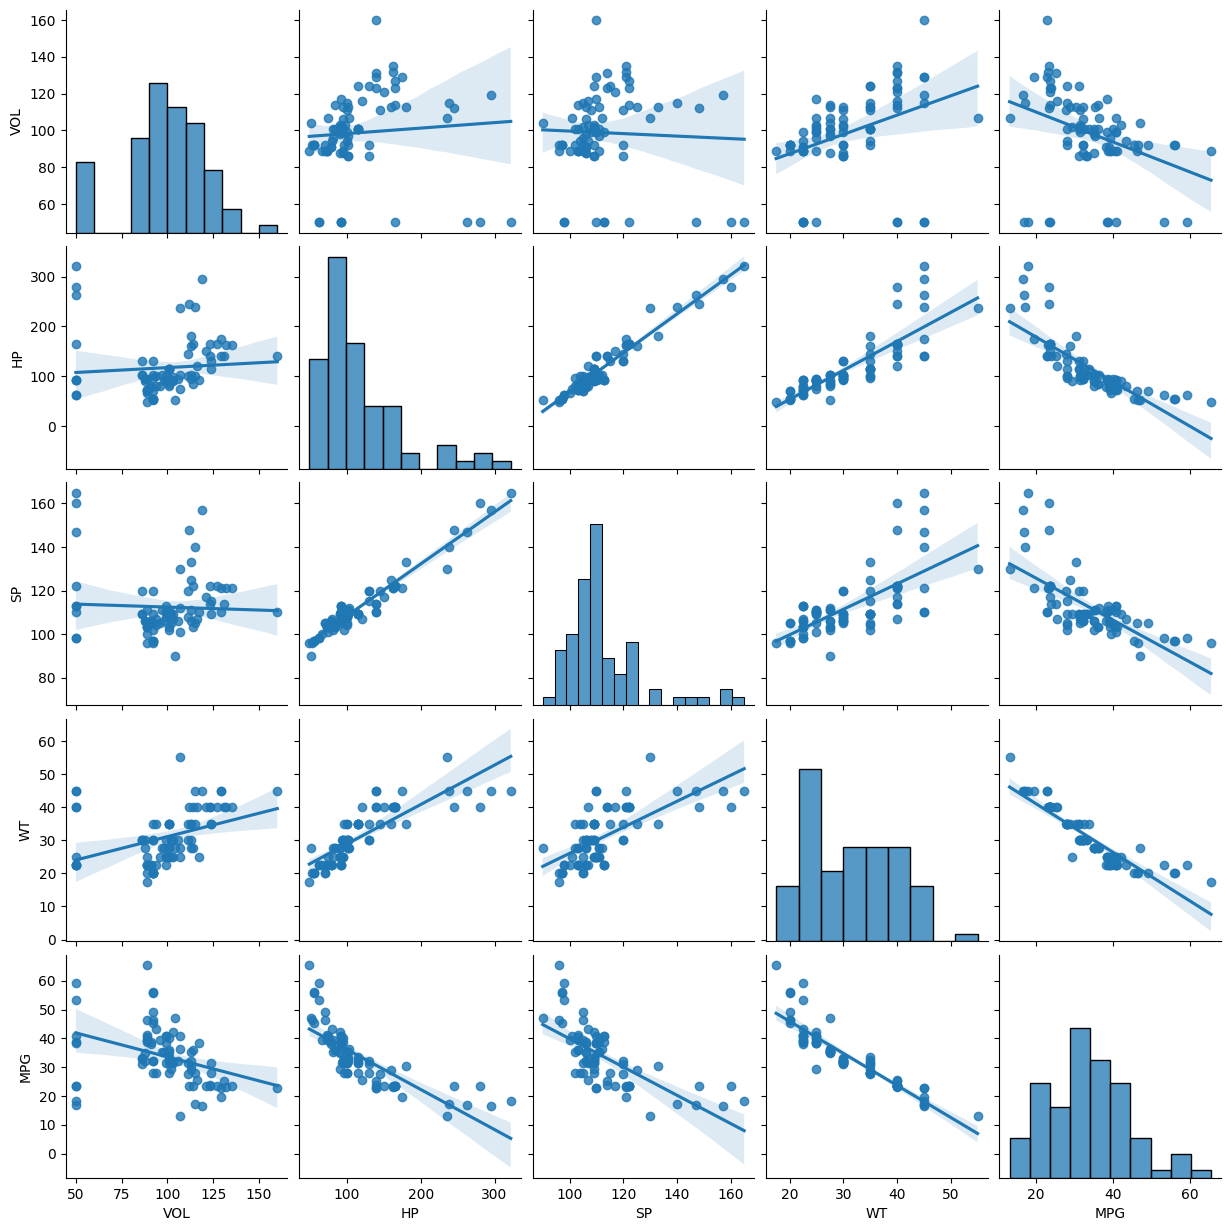

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = df.drop(columns=['MAKE_MODEL'])

feature_columns = ['VOL', 'HP', 'SP', 'WT']
target_column = 'MPG'

X = df.drop(columns=['MPG'])
y = df['MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("\nCoefficients:", model.coef_)
print("Intercept:", model.intercept_)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()

sns.pairplot(df, vars=feature_columns + [target_column], kind='reg')
plt.show()